In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns


In [2]:
df = pd.read_excel("cancer.xlsx") 

In [3]:
df

,S.No,Patients Name,Father's/Husbands Name,Age,Sex,Benign,Borderline,Malignant,Type of Cancer,Location,Immuno-Pathology\nstudy
0,1,Parvinder Singh,Darshan Singh,34.0,Male,NaN,NaN,NaN,Bone Cancer,Jaw Bone,Ameloblastoma
1,2,Harbans Singh,Logar Singh,62.0,Male,P,NaN,NaN,Brain and Central Nervous System Cancer,Cerebral Hemisphere,GBM
2,3,Darshan Singh,Arjan Singh,66.0,Male,P,NaN,NaN,Genetourinary system,NaN,Transitional Cell Carcinoma
3,4,Gurdeep Singh,Jaga Singh,48.0,Male,NaN,NaN,P,Skin Cancer,Nose,Basal cell carcinoma
4,5,Sharto Bai,NaN,66.0,Female,P,NaN,NaN,Female Reproductive Cancer,Cervix,Squamous Cell Carcinoma
...,...,...,...,...,...,...,...,...,...,...,...
2488,2491,NaN,NaN,43.0,Female,P,NaN,NaN,NaN,NaN,"mastitis,"
2489,2492,NaN,NaN,NaN,Male,P,NaN,NaN,NaN,NaN,NaN
2490,2493,Sagar Singhg,Harnek Singh,70.0,Male,P,NaN,NaN,NaN,NaN,Squamous Cell Carcinoma
2491,2494,Sudsla Devi,Balwinder Singh,60.0,Female,P,NaN,NaN,NaN,NaN,RCC


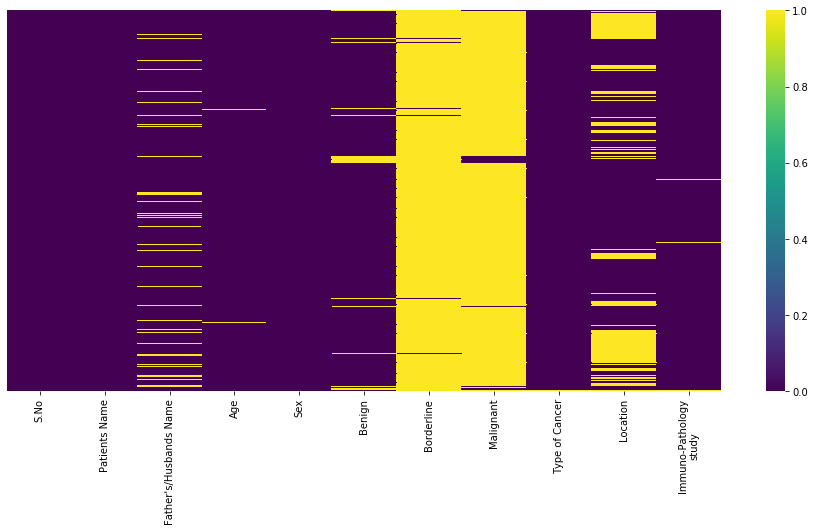

In [4]:
plt.figure(figsize=(16,7))
sns.heatmap(df.isnull(), yticklabels=False, cmap='viridis')

Text(0.5, 1.0, 'Cases by Age')

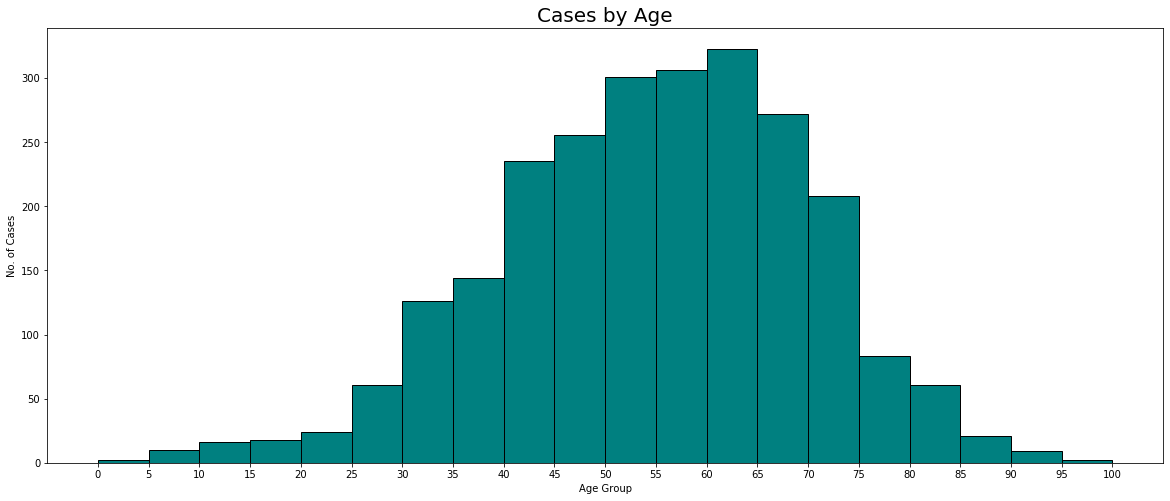

In [5]:
plt.figure(figsize=(20,8))
bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]
plt.hist(df['Age'],bins=bins, edgecolor='k',color="teal")
plt.xticks(ticks=bins, labels= bins)
plt.xlabel("Age Group")
plt.ylabel("No. of Cases")
plt.title("Cases by Age", Fontsize=20)

Text(0.5, 1.0, 'Cases by Age on log scale')

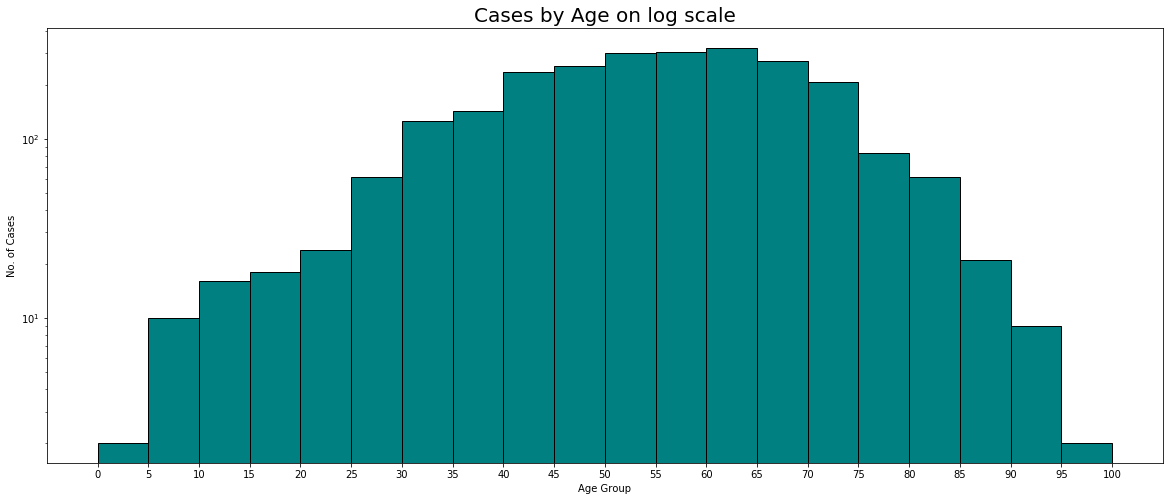

In [6]:
plt.figure(figsize=(20,8))
bins=np.arange(0,105,5)
plt.hist(df['Age'],bins=bins, edgecolor='k',log=True,color="teal")
plt.xticks(ticks=bins, labels= bins)
plt.xlabel("Age Group")
plt.ylabel("No. of Cases")
plt.title("Cases by Age on log scale", Fontsize=20)

{'whiskers': [<matplotlib.lines.Line2D at 0x1a17e86710>,
 'caps': [<matplotlib.lines.Line2D at 0x1a17e62c50>,
 'boxes': [<matplotlib.patches.PathPatch at 0x1a17e51e90>],
 'medians': [<matplotlib.lines.Line2D at 0x1a17e7bcd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a17e75750>],
 'means': [<matplotlib.lines.Line2D at 0x1a17e86d90>]}

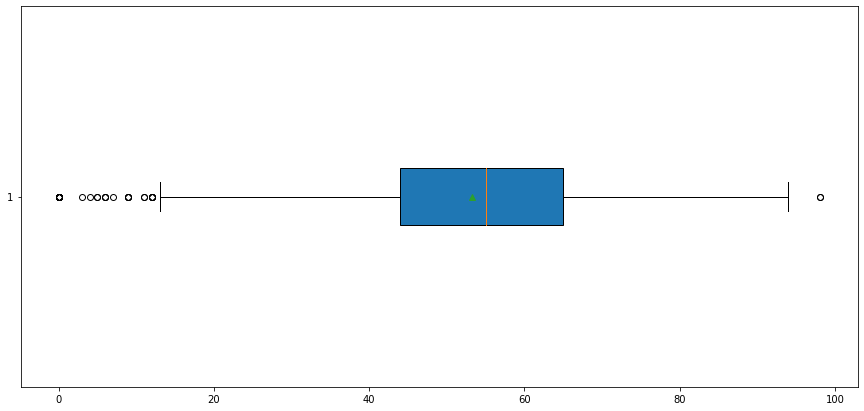

In [7]:
plt.figure(figsize=(15,7))
df['Age'].fillna(0,inplace=True)
a=df['Age'].astype('int')[1:]
plt.boxplot(a,vert = False, patch_artist=True,showmeans=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2493 entries, 0 to 2492
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   S.No                    2493 non-null   int64  
 1   Patients Name           2482 non-null   object 
 2   Father's/Husbands Name  2219 non-null   object 
 3   Age                     2493 non-null   float64
 4   Sex                     2493 non-null   object 
 5   Benign                  2379 non-null   object 
 6   Borderline              41 non-null     object 
 7   Malignant               72 non-null     object 
 8   Type of Cancer          2487 non-null   object 
 9   Location                1758 non-null   object 
 10  Immuno-Pathology
study  2476 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 214.4+ KB


Text(0.5, 1.0, 'Genderwise Cases')

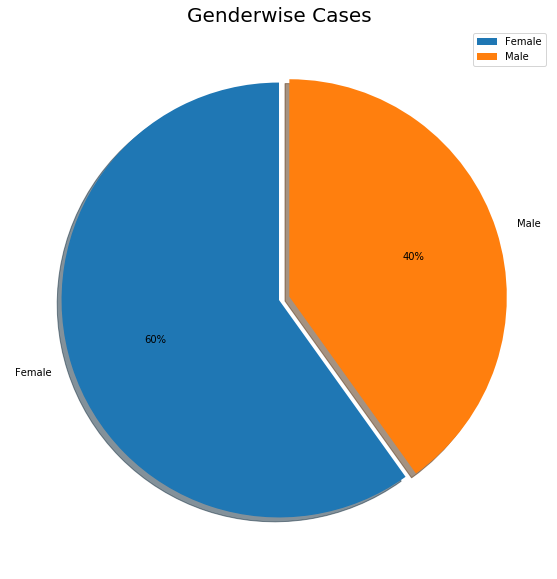

In [9]:
plt.figure(figsize=(10,10))
df['Sex'].value_counts()
plt.pie(df['Sex'].value_counts(),labels=['Female','Male'],shadow=True,explode=[0,0.05],autopct='%1.f%%',startangle=90)
plt.legend(loc='upper right')
df['Sex'].value_counts()
plt.title("Genderwise Cases", Fontsize=20)

Text(0.5, 1.0, 'Stage of Cancer Distribution')

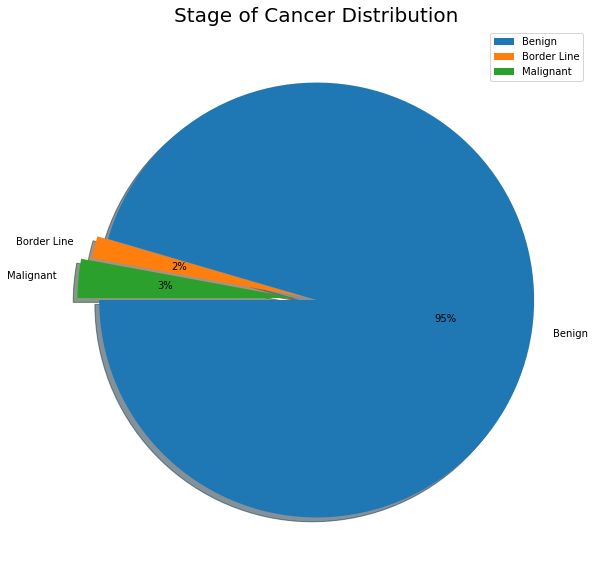

In [10]:
plt.figure(figsize=(10,10))
benign = df['Benign'].count()
borderline =df['Borderline'].count()
malignant = df['Malignant'].count()
plt.pie([benign,borderline,malignant],labels=['Benign','Border Line','Malignant'],shadow=True,explode=[0,0.05,0.1],autopct='%1.f%%',startangle=900)
plt.legend(loc='upper right')
df['Sex'].value_counts()
plt.title("Stage of Cancer Distribution", Fontsize=20)

Breast Cancer                              611
Female Reproductive Cancer                 462
Head and neck cancer                       336
Oesophagial Cancer                         229
Gastrointestinal tract Cancer              224
Male Reproductive Cancer                   132
Skin Cancer                                118
Thyroid Cancer                              43
Genetourinary system                        39
Lymphoma                                    38
Salivary Gland Cancer                       26
Laryngeal Cancer                            25
Oropharyngeal Cancer                        24
Primary of Unknown Origen                   23
Soft Tissue Sarcoma                         20
Respiratory tract Cancer                    20
Brain and Central Nervous System Cancer     19
Sarcoma                                     14
Oropharyngeal Cancer                        13
Non-Hodking Lymphoma                        10
Name: Type of Cancer, dtype: int64


(array([], dtype=float64), <a list of 0 Text xticklabel objects>)

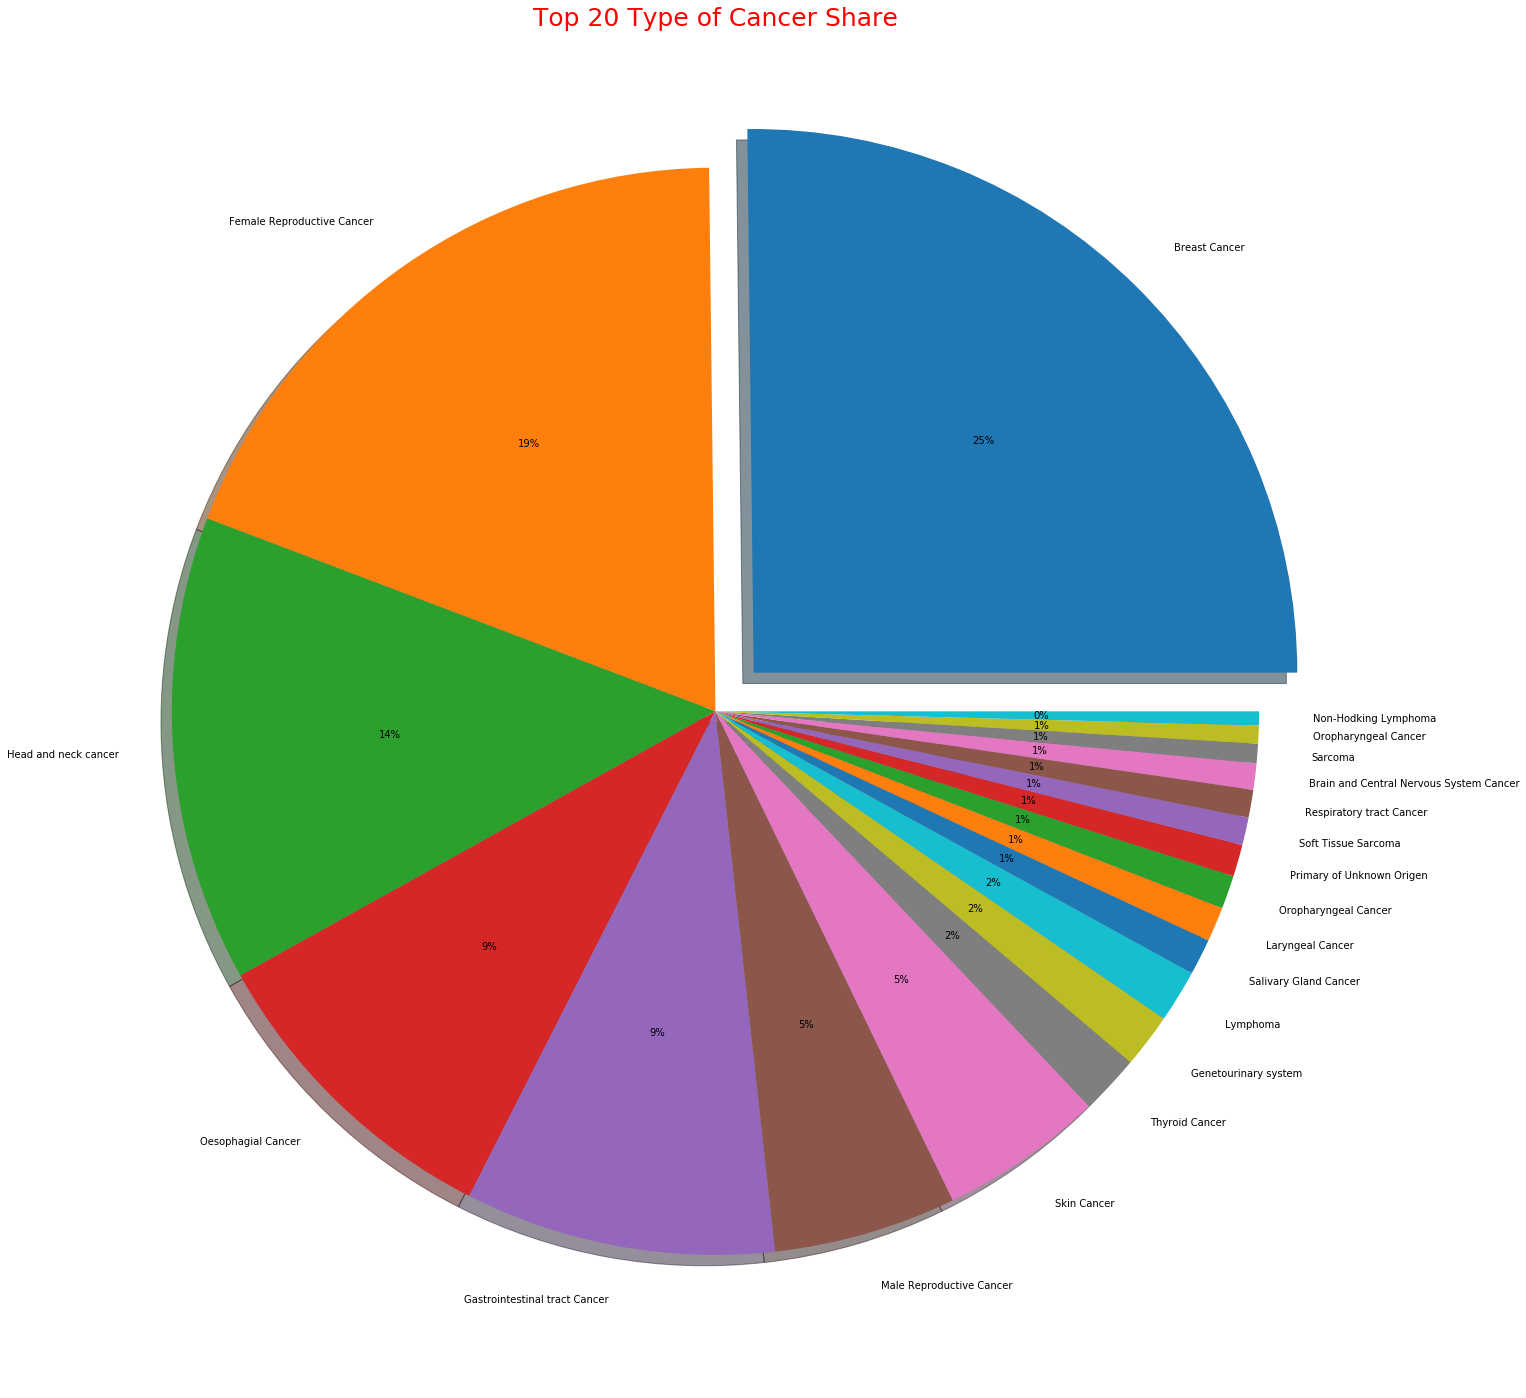

In [11]:
a=df['Type of Cancer'].value_counts().sort_values().nlargest(20)
print(a)
exp= np.zeros(20)
exp[0]=0.1
a.plot.pie(figsize=(25,25),autopct='%1.f%%',explode=exp,shadow=True)
plt.ylabel("")
plt.title('Top 20 Type of Cancer Share',Fontsize=25,color='r')
plt.xticks(rotation=45)

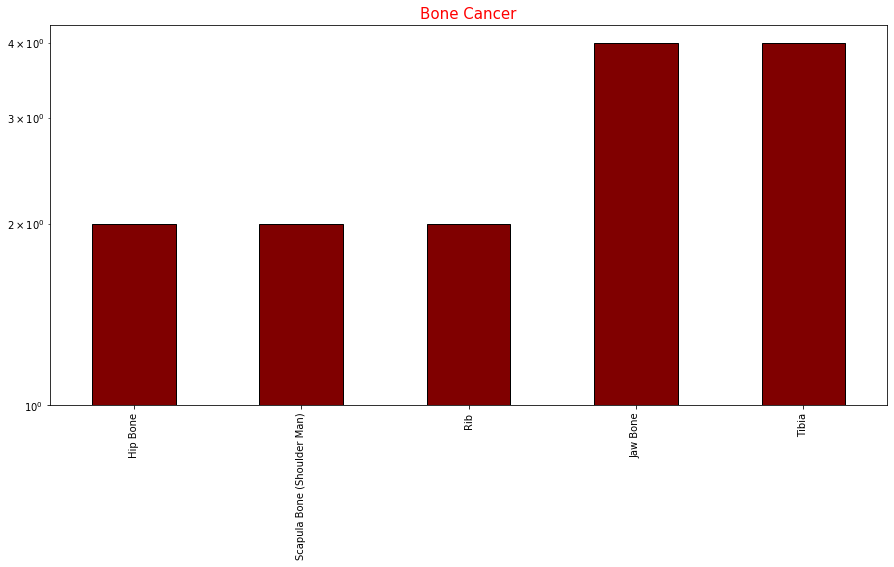

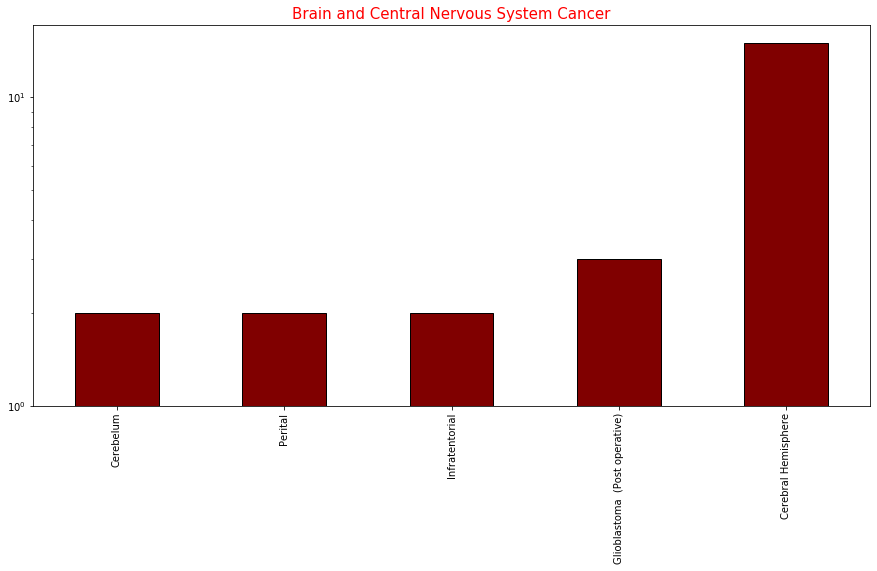

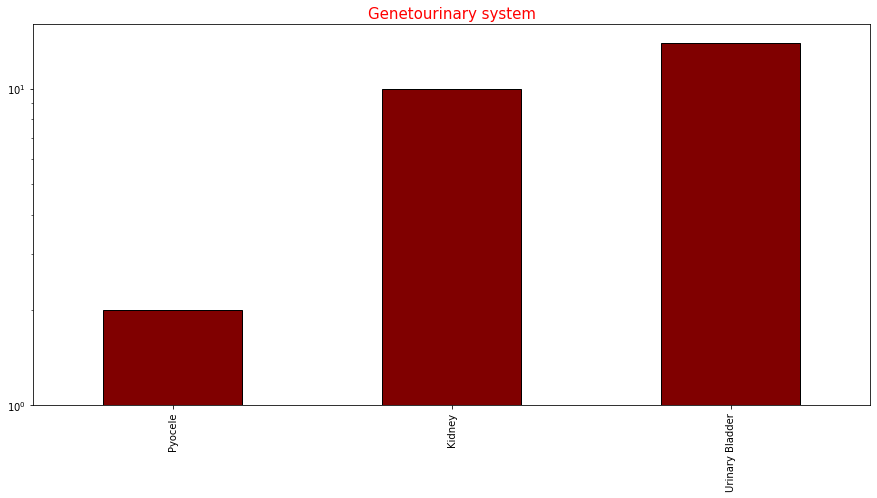

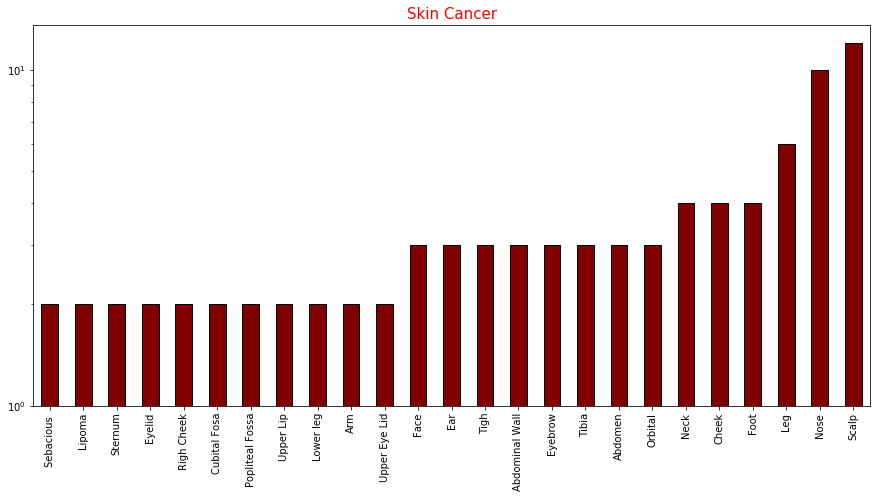

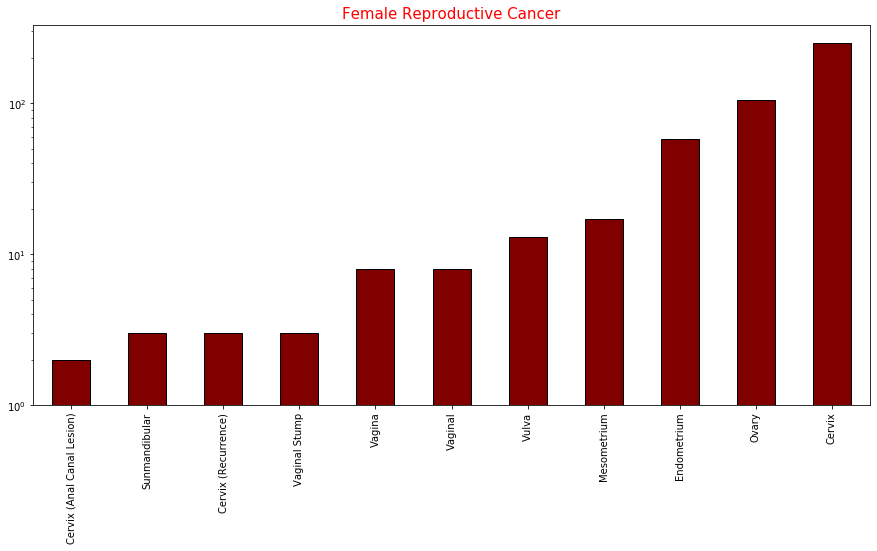

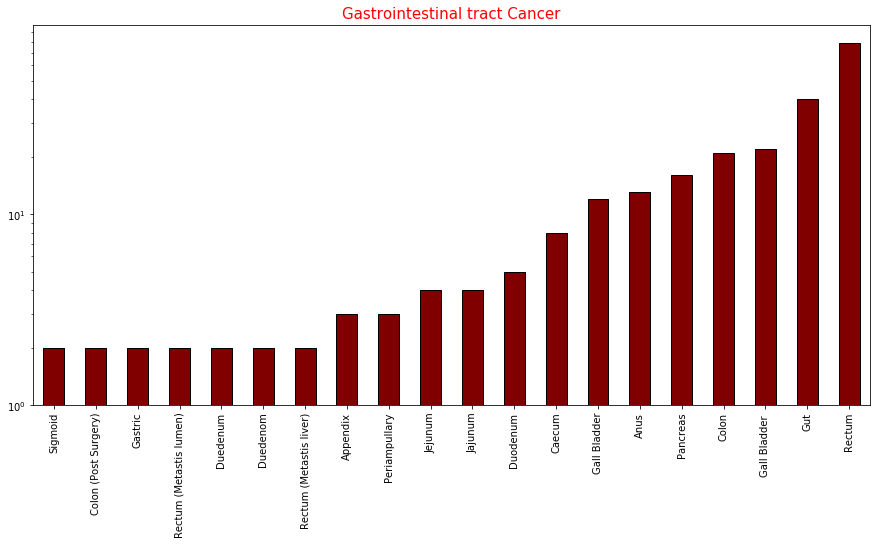

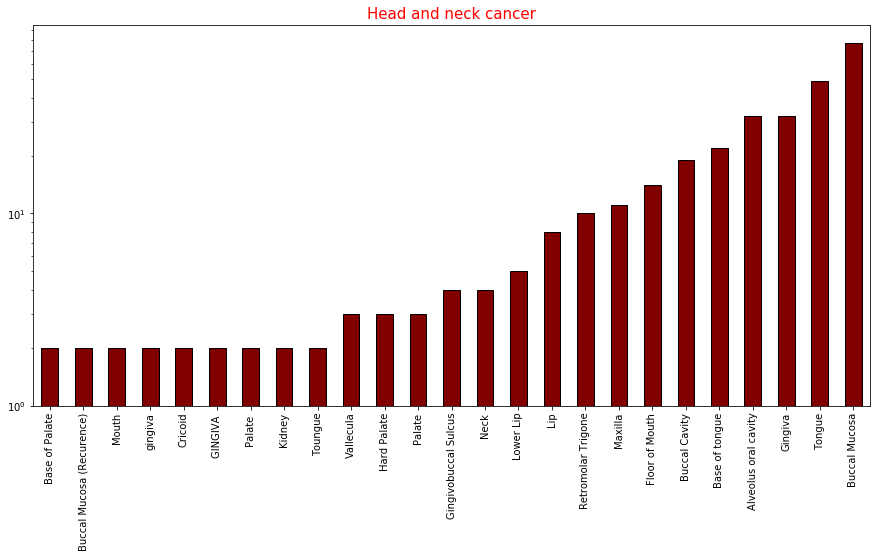

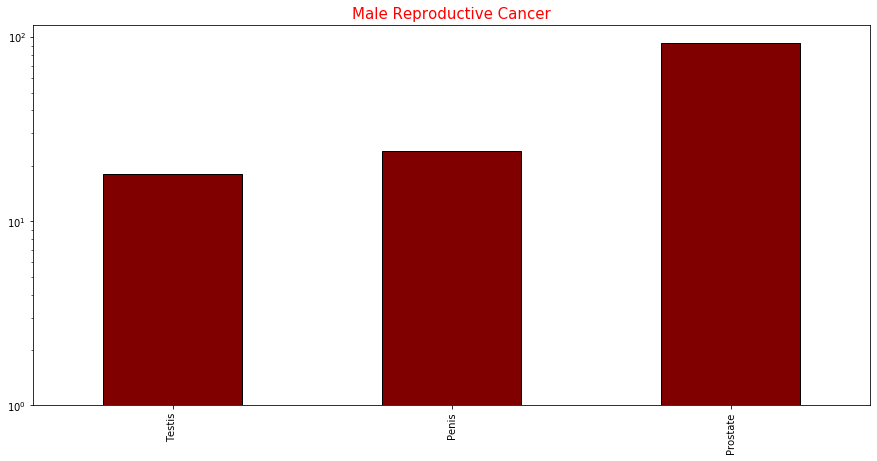

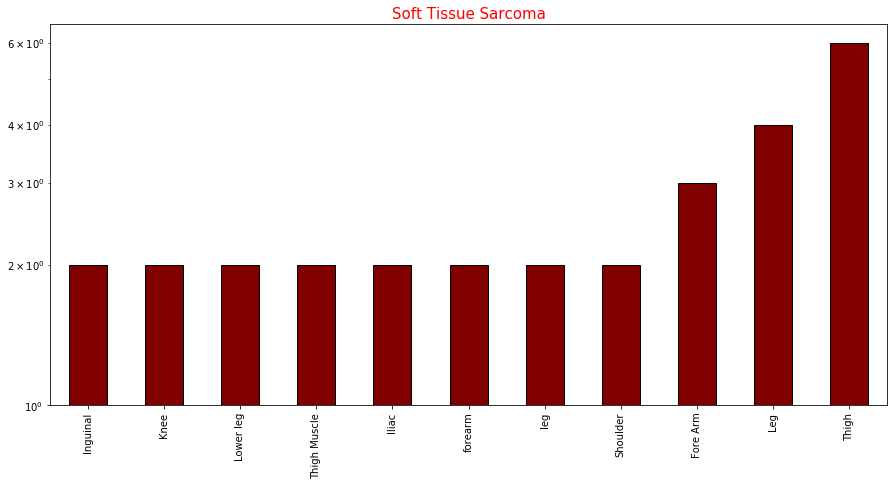

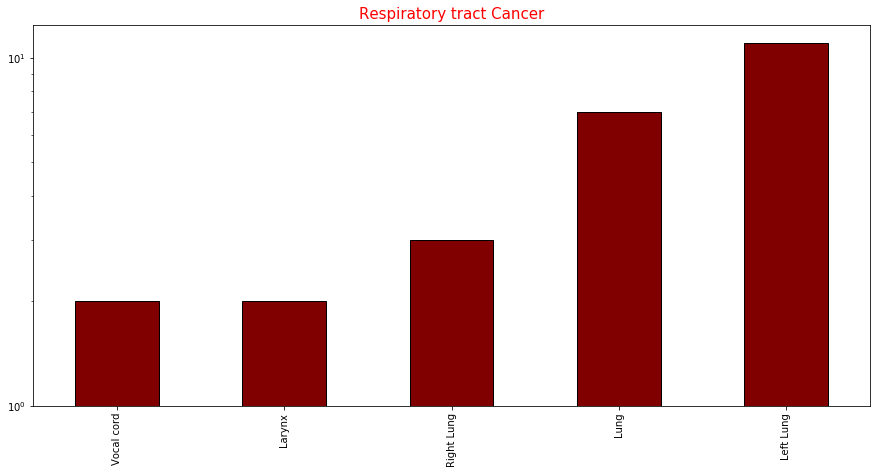

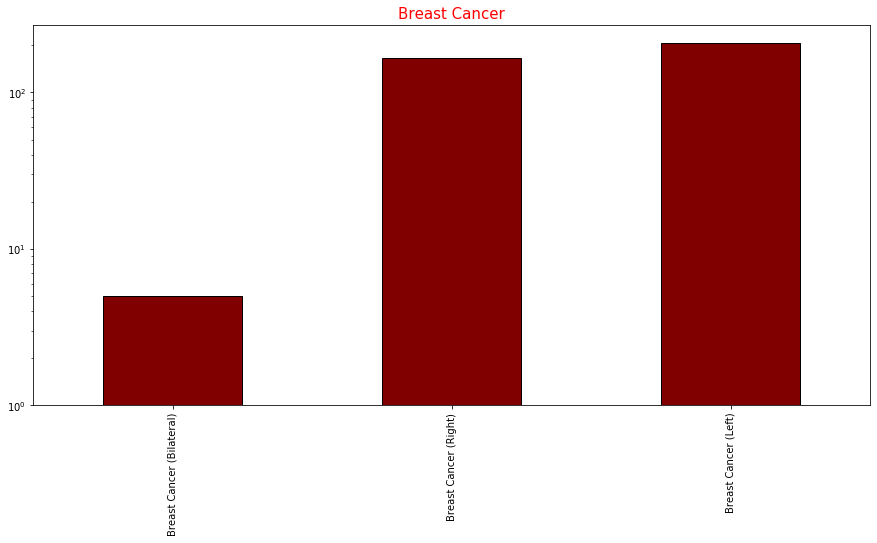

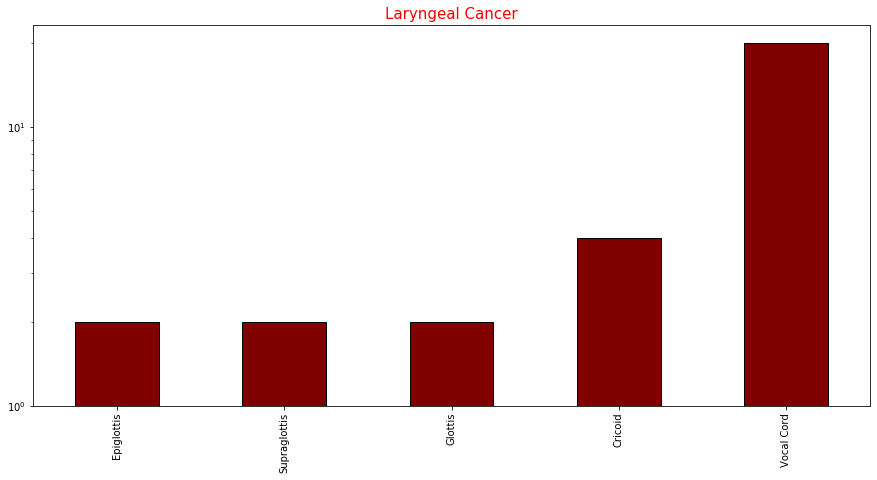

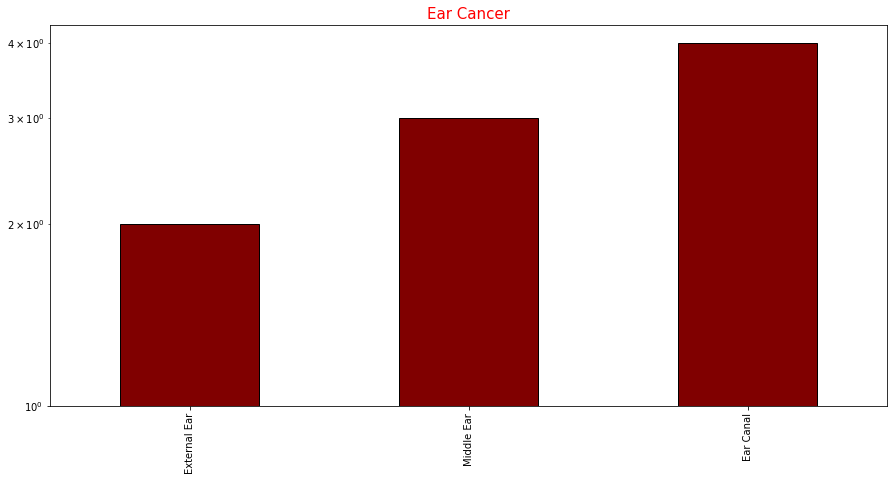

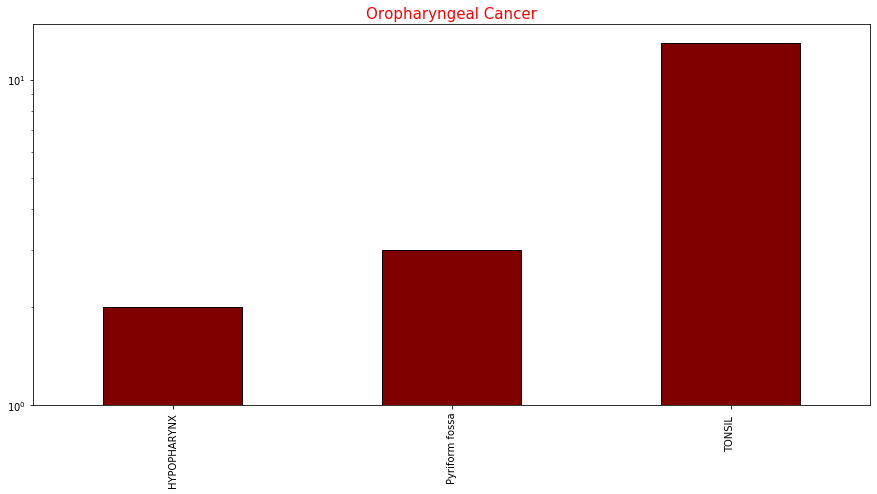

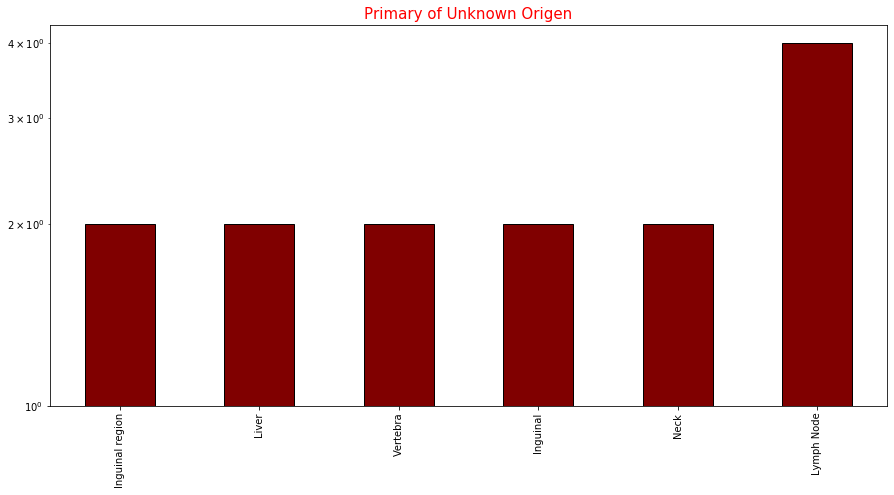

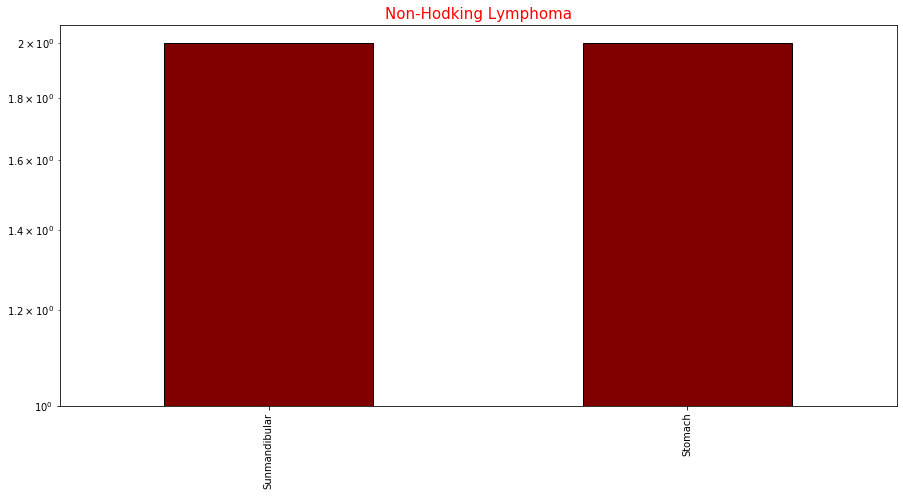

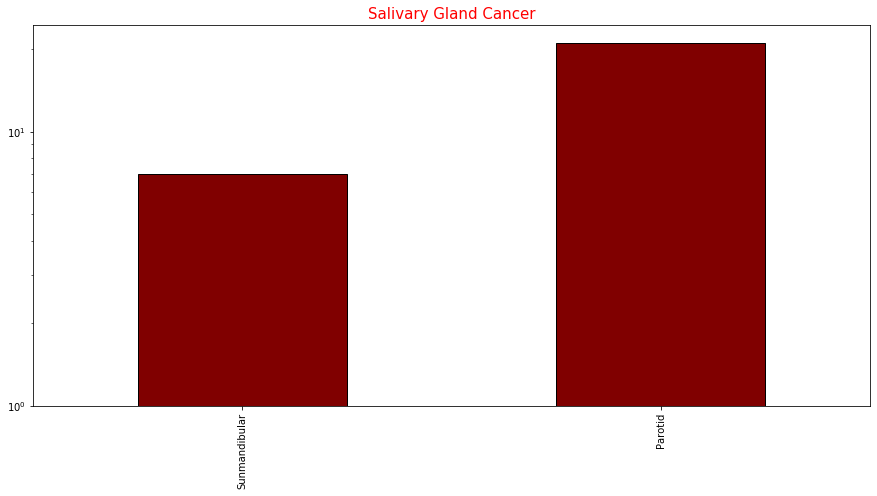

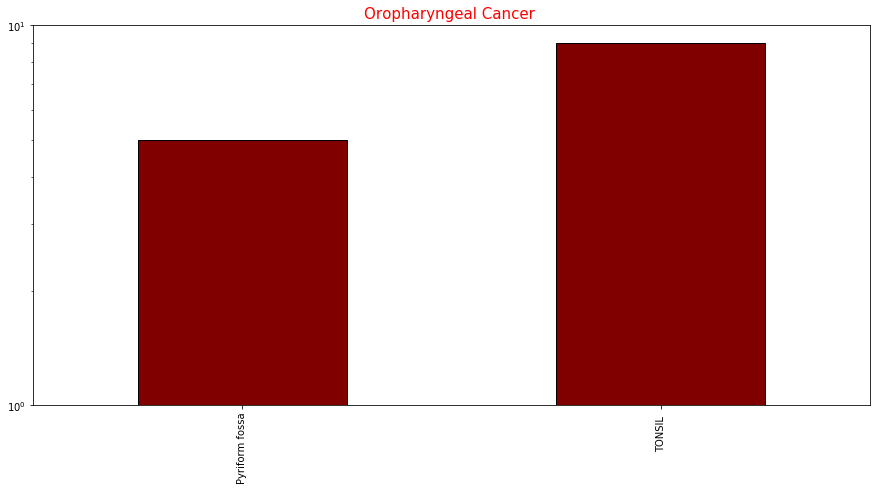

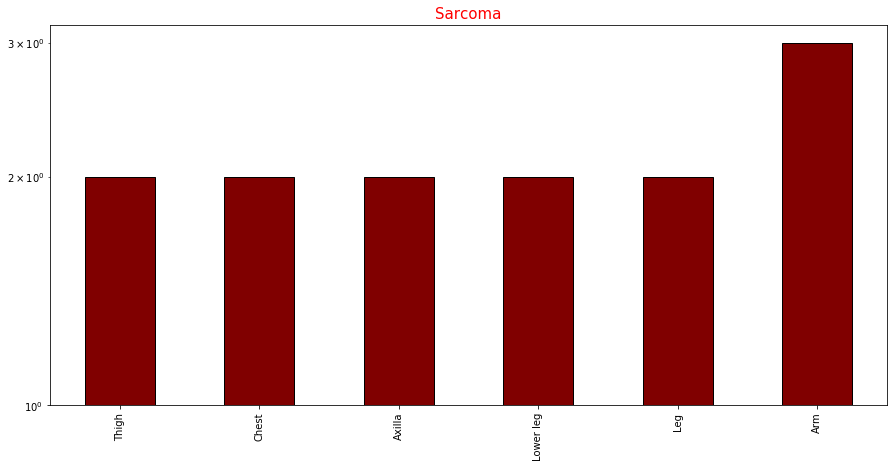

In [12]:
for item in df['Type of Cancer'].unique():
    c=['cyan','torquoise','grey','c','r','pink','maroon','cyan','torquoise','grey','c','r','pink','maroon','cyan','torquoise','grey','c','r']
    col=3
    dis= (df['Type of Cancer'].unique()).tolist()
    filt = df['Type of Cancer']==item
    at = df.loc[filt,'Location'].value_counts().nlargest(25).sort_values()
    #print(at)
    if len(at)>1:
        plt.figure(figsize=(15,7))
        at.plot.bar(subplots=True,log=True,edgecolor='k',color='maroon')
        plt.title(item,fontsize=15,color='r')
        
plt.show()